<a href="https://colab.research.google.com/github/Ananyaricha31/MovieRecomendation/blob/master/MovieRecomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['movie_metadata.csv']))
df.shape

NameError: ignored

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
title=list(df.get('movie_title'))

In [ ]:
print (title)

['Avatar\xa0', "Pirates of the Caribbean: At World's End\xa0", 'Spectre\xa0', 'The Dark Knight Rises\xa0', 'Star Wars: Episode VII - The Force Awakens\xa0            ', 'John Carter\xa0', 'Spider-Man 3\xa0', 'Tangled\xa0', 'Avengers: Age of Ultron\xa0', 'Harry Potter and the Half-Blood Prince\xa0', 'Batman v Superman: Dawn of Justice\xa0', 'Superman Returns\xa0', 'Quantum of Solace\xa0', "Pirates of the Caribbean: Dead Man's Chest\xa0", 'The Lone Ranger\xa0', 'Man of Steel\xa0', 'The Chronicles of Narnia: Prince Caspian\xa0', 'The Avengers\xa0', 'Pirates of the Caribbean: On Stranger Tides\xa0', 'Men in Black 3\xa0', 'The Hobbit: The Battle of the Five Armies\xa0', 'The Amazing Spider-Man\xa0', 'Robin Hood\xa0', 'The Hobbit: The Desolation of Smaug\xa0', 'The Golden Compass\xa0', 'King Kong\xa0', 'Titanic\xa0', 'Captain America: Civil War\xa0', 'Battleship\xa0', 'Jurassic World\xa0', 'Skyfall\xa0', 'Spider-Man 2\xa0', 'Iron Man 3\xa0', 'Alice in Wonderland\xa0', 'X-Men: The Last Stand\

In [ ]:
title=(df.get('imdb_score'))
print(title)

0       7.9
1       7.1
2       6.8
3       8.5
4       7.1
       ... 
5038    7.7
5039    7.5
5040    6.3
5041    6.3
5042    6.6
Name: imdb_score, Length: 5043, dtype: float64


In [ ]:
data=df.values
X=data[: ,1:]
Y=data[: ,0]
print(X.shape,Y.shape)


(5043, 27) (5043,)


MOVIE RECOMMENDATION PROJECT

In [ ]:
import numpy as np
import pandas as pd
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#-----------------------------------------------------------
column_names = ['user_id','item_id','rating','timestamp']   #this was missing 
#-----------------------------------------------------------

df = pd.read_csv('u.data',sep='\t',names=column_names)

In [ ]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
movie_title = pd.read_csv('u.item',header=None,sep='\|',encoding='ISO-8859-1')

In [ ]:
movie_title.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
movie_title.shape

(1682, 24)

In [ ]:
movie_title=movie_title[[0,1]]

In [ ]:
movie_title.columns=['item_id','title']

In [ ]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
df = pd.merge(df,movie_title,on="item_id")

In [ ]:
df


,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [ ]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [ ]:
#EXPLORATORY DATA ANALYSIS:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [ ]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [ ]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [ ]:
ratings=pd.DataFrame(df.groupby('title').count()['rating']

In [ ]:
ratings.head()

,rating
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [ ]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [ ]:
ratings.sort_values(by='rating',ascending=False)


,rating,num of ratings
title,,
Star Wars (1977),583,583
Contact (1997),509,509
Fargo (1996),508,508
Return of the Jedi (1983),507,507
Liar Liar (1997),485,485
...,...,...
Century (1993),1,1
Shadows (Cienie) (1988),1,1
Shadow of Angels (Schatten der Engel) (1976),1,1


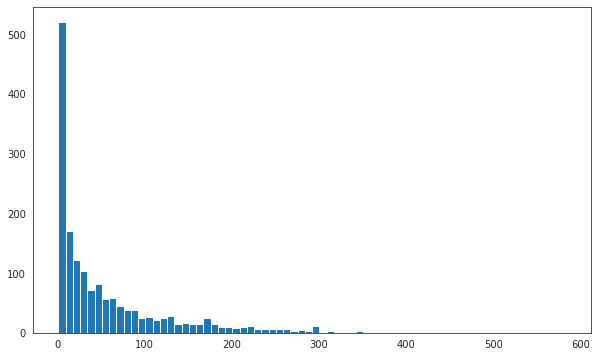

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'],bins=70)
plt.show()

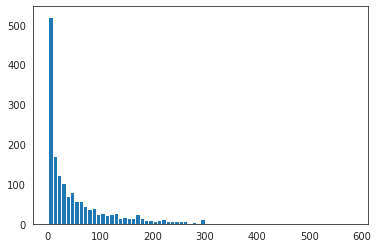

In [ ]:
plt.hist(ratings['rating'],bins=70)
plt.show()

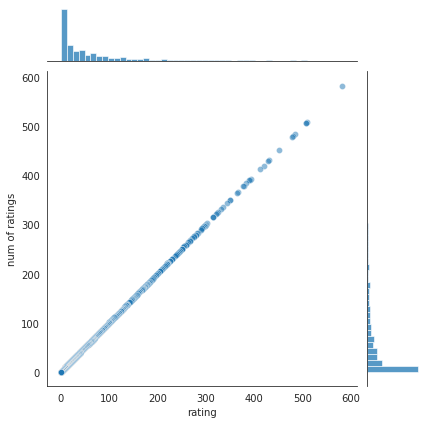

In [ ]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [ ]:
#MOVIE RECOMENDATION FOR PANDAS:

In [ ]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
moviemat=df.pivot_table(index="user_id",columns="title",values="rating")

In [ ]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [ ]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),583,583
Contact (1997),509,509
Fargo (1996),508,508
Return of the Jedi (1983),507,507
Liar Liar (1997),485,485


In [ ]:
starwars_user_ratings=moviemat['Star Wars (1977)']

In [ ]:
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [ ]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

In [ ]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [ ]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [ ]:
corr_starwars.dropna(inplace=True)

In [ ]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [ ]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
#only suggest movie that r watched by more than 100
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [ ]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [ ]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [ ]:
#predict function

In [ ]:
def predict_movies(movie_name):
  movie_user_ratings=moviemat[movie_name]